27/02/67 การพยากรณ์อัตราผู้ว่างงานในระบบและนอกระบบในประเทศไทย

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
df = pd.read_csv('dataset_unemployment2.csv')

In [5]:
df

,system,year,quarter,region,SEX,age_group,OCCUPATION,labor_force_sta,value,unit,source
0,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,นายจ้าง,รวม,0.37,พันคน,สำนักงานสถิติแห่งชาติ
1,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ประกอบธุรกิจส่วนตัว,หางานทำ,0.17,พันคน,สำนักงานสถิติแห่งชาติ
2,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ช่วยธุรกิจครัวเรือน,ไม่หางานทำ/พร้อมที่จะทำงาน,0.20,พันคน,สำนักงานสถิติแห่งชาติ
3,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างรัฐบาล,รวม,1.83,พันคน,สำนักงานสถิติแห่งชาติ
4,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างเอกชน,หางานทำ,0.11,พันคน,สำนักงานสถิติแห่งชาติ
...,...,...,...,...,...,...,...,...,...,...,...
5234,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,รวม,25-29 ปี,ช่วยธุรกิจครัวเรือน,หางานทำ,NaN,พันคน,สำนักงานสถิติแห่งชาติ
5235,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,ชาย,25-29 ปี,ลูกจ้างรัฐบาล,ไม่หางานทำ/พร้อมที่จะทำงาน,NaN,พันคน,สำนักงานสถิติแห่งชาติ
5236,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,หญิง,25-29 ปี,ลูกจ้างเอกชน,รวม,NaN,พันคน,สำนักงานสถิติแห่งชาติ
5237,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,รวม,25-29 ปี,การรวมกลุ่ม,หางานทำ,NaN,พันคน,สำนักงานสถิติแห่งชาติ


In [6]:
df['age_group'] = df['age_group'].str.extract('(\d+)').fillna(0).astype('int64')

In [7]:
df

,system,year,quarter,region,SEX,age_group,OCCUPATION,labor_force_sta,value,unit,source
0,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60,นายจ้าง,รวม,0.37,พันคน,สำนักงานสถิติแห่งชาติ
1,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60,ประกอบธุรกิจส่วนตัว,หางานทำ,0.17,พันคน,สำนักงานสถิติแห่งชาติ
2,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60,ช่วยธุรกิจครัวเรือน,ไม่หางานทำ/พร้อมที่จะทำงาน,0.20,พันคน,สำนักงานสถิติแห่งชาติ
3,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60,ลูกจ้างรัฐบาล,รวม,1.83,พันคน,สำนักงานสถิติแห่งชาติ
4,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60,ลูกจ้างเอกชน,หางานทำ,0.11,พันคน,สำนักงานสถิติแห่งชาติ
...,...,...,...,...,...,...,...,...,...,...,...
5234,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,รวม,25,ช่วยธุรกิจครัวเรือน,หางานทำ,NaN,พันคน,สำนักงานสถิติแห่งชาติ
5235,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,ชาย,25,ลูกจ้างรัฐบาล,ไม่หางานทำ/พร้อมที่จะทำงาน,NaN,พันคน,สำนักงานสถิติแห่งชาติ
5236,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,หญิง,25,ลูกจ้างเอกชน,รวม,NaN,พันคน,สำนักงานสถิติแห่งชาติ
5237,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,รวม,25,การรวมกลุ่ม,หางานทำ,NaN,พันคน,สำนักงานสถิติแห่งชาติ


In [15]:
# เปลี่ยนชื่อคอลัมน์ให้เป็นตัวอักษรพิมพ์เล็ก
df.columns = df.columns.str.lower()
df.to_csv('updated_data.csv', index=False)

In [16]:
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value,unit,source
0,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,นายจ้าง,รวม,0.37,พันคน,สำนักงานสถิติแห่งชาติ
1,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ประกอบธุรกิจส่วนตัว,หางานทำ,0.17,พันคน,สำนักงานสถิติแห่งชาติ
2,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ช่วยธุรกิจครัวเรือน,ไม่หางานทำ/พร้อมที่จะทำงาน,0.20,พันคน,สำนักงานสถิติแห่งชาติ
3,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างรัฐบาล,รวม,1.83,พันคน,สำนักงานสถิติแห่งชาติ
4,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60 ปีขึ้นไป,ลูกจ้างเอกชน,หางานทำ,0.11,พันคน,สำนักงานสถิติแห่งชาติ
...,...,...,...,...,...,...,...,...,...,...,...
5234,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,รวม,25-29 ปี,ช่วยธุรกิจครัวเรือน,หางานทำ,NaN,พันคน,สำนักงานสถิติแห่งชาติ
5235,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,ชาย,25-29 ปี,ลูกจ้างรัฐบาล,ไม่หางานทำ/พร้อมที่จะทำงาน,NaN,พันคน,สำนักงานสถิติแห่งชาติ
5236,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,หญิง,25-29 ปี,ลูกจ้างเอกชน,รวม,NaN,พันคน,สำนักงานสถิติแห่งชาติ
5237,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,รวม,25-29 ปี,การรวมกลุ่ม,หางานทำ,NaN,พันคน,สำนักงานสถิติแห่งชาติ


In [17]:
# ปรับปรุงค่าในคอลัมน์ 'age_group'
df['age_group'] = df['age_group'].astype(str).str.extract('(\d+)').fillna(0).astype('int64')

# บันทึก DataFrame ใหม่
df.to_csv('updated_data.csv', index=False)

In [18]:
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value,unit,source
0,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60,นายจ้าง,รวม,0.37,พันคน,สำนักงานสถิติแห่งชาติ
1,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60,ประกอบธุรกิจส่วนตัว,หางานทำ,0.17,พันคน,สำนักงานสถิติแห่งชาติ
2,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60,ช่วยธุรกิจครัวเรือน,ไม่หางานทำ/พร้อมที่จะทำงาน,0.20,พันคน,สำนักงานสถิติแห่งชาติ
3,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60,ลูกจ้างรัฐบาล,รวม,1.83,พันคน,สำนักงานสถิติแห่งชาติ
4,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60,ลูกจ้างเอกชน,หางานทำ,0.11,พันคน,สำนักงานสถิติแห่งชาติ
...,...,...,...,...,...,...,...,...,...,...,...
5234,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,รวม,25,ช่วยธุรกิจครัวเรือน,หางานทำ,NaN,พันคน,สำนักงานสถิติแห่งชาติ
5235,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,ชาย,25,ลูกจ้างรัฐบาล,ไม่หางานทำ/พร้อมที่จะทำงาน,NaN,พันคน,สำนักงานสถิติแห่งชาติ
5236,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,หญิง,25,ลูกจ้างเอกชน,รวม,NaN,พันคน,สำนักงานสถิติแห่งชาติ
5237,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,รวม,25,การรวมกลุ่ม,หางานทำ,NaN,พันคน,สำนักงานสถิติแห่งชาติ


In [19]:
#ตรวจสอบค่า Outlier ใน Dataset
df = pd.read_csv('dataset_unemployment2.csv')

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df < lower_bound) | (df > upper_bound))

print(outliers.sum())

OCCUPATION           0
SEX                  0
age_group            0
labor_force_sta      0
quarter              0
region               0
source               0
system               0
unit                 0
value              603
year                 0
dtype: int64


<ipython-input-19-52f436982bfd>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-19-52f436982bfd>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-19-52f436982bfd>:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < lower_bound) | (df > upper_bound))


In [20]:
#หาค่า Duplicate ใน Dataset
df = pd.read_csv('updated_data.csv')
duplicates = df[df.duplicated()]

In [21]:
print(duplicates)

Empty DataFrame
Columns: [system, year, quarter, region, sex, age_group, occupation, labor_force_sta, value, unit, source]
Index: []


In [22]:
df.shape

(5239, 11)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5239 entries, 0 to 5238
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   system           5239 non-null   object 
 1   year             5239 non-null   int64  
 2   quarter          5239 non-null   object 
 3   region           5239 non-null   object 
 4   sex              5239 non-null   object 
 5   age_group        5239 non-null   int64  
 6   occupation       5239 non-null   object 
 7   labor_force_sta  5239 non-null   object 
 8   value            4861 non-null   float64
 9   unit             5239 non-null   object 
 10  source           5239 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 450.4+ KB


In [24]:
df.describe()

,year,age_group,value
count,5239.000000,5239.000000,4861.000000
mean,2559.521474,28.430998,20.824034
std,2.289364,16.816922,49.712295
min,2556.000000,0.000000,0.010000
25%,2558.000000,15.000000,2.040000
50%,2560.000000,25.000000,5.770000
75%,2562.000000,40.000000,17.900000
max,2563.000000,60.000000,745.180000


In [25]:
df.isnull().sum()

system               0
year                 0
quarter              0
region               0
sex                  0
age_group            0
occupation           0
labor_force_sta      0
value              378
unit                 0
source               0
dtype: int64

In [26]:
df = df.drop('unit', axis=1)

In [27]:
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value,source
0,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60,นายจ้าง,รวม,0.37,สำนักงานสถิติแห่งชาติ
1,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60,ประกอบธุรกิจส่วนตัว,หางานทำ,0.17,สำนักงานสถิติแห่งชาติ
2,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60,ช่วยธุรกิจครัวเรือน,ไม่หางานทำ/พร้อมที่จะทำงาน,0.20,สำนักงานสถิติแห่งชาติ
3,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60,ลูกจ้างรัฐบาล,รวม,1.83,สำนักงานสถิติแห่งชาติ
4,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60,ลูกจ้างเอกชน,หางานทำ,0.11,สำนักงานสถิติแห่งชาติ
...,...,...,...,...,...,...,...,...,...,...
5234,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,รวม,25,ช่วยธุรกิจครัวเรือน,หางานทำ,NaN,สำนักงานสถิติแห่งชาติ
5235,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,ชาย,25,ลูกจ้างรัฐบาล,ไม่หางานทำ/พร้อมที่จะทำงาน,NaN,สำนักงานสถิติแห่งชาติ
5236,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,หญิง,25,ลูกจ้างเอกชน,รวม,NaN,สำนักงานสถิติแห่งชาติ
5237,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,รวม,25,การรวมกลุ่ม,หางานทำ,NaN,สำนักงานสถิติแห่งชาติ


In [28]:
df['value'] = df['value'].fillna(0)

In [29]:
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value,source
0,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60,นายจ้าง,รวม,0.37,สำนักงานสถิติแห่งชาติ
1,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60,ประกอบธุรกิจส่วนตัว,หางานทำ,0.17,สำนักงานสถิติแห่งชาติ
2,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60,ช่วยธุรกิจครัวเรือน,ไม่หางานทำ/พร้อมที่จะทำงาน,0.20,สำนักงานสถิติแห่งชาติ
3,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60,ลูกจ้างรัฐบาล,รวม,1.83,สำนักงานสถิติแห่งชาติ
4,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60,ลูกจ้างเอกชน,หางานทำ,0.11,สำนักงานสถิติแห่งชาติ
...,...,...,...,...,...,...,...,...,...,...
5234,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,รวม,25,ช่วยธุรกิจครัวเรือน,หางานทำ,0.00,สำนักงานสถิติแห่งชาติ
5235,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,ชาย,25,ลูกจ้างรัฐบาล,ไม่หางานทำ/พร้อมที่จะทำงาน,0.00,สำนักงานสถิติแห่งชาติ
5236,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,หญิง,25,ลูกจ้างเอกชน,รวม,0.00,สำนักงานสถิติแห่งชาติ
5237,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,รวม,25,การรวมกลุ่ม,หางานทำ,0.00,สำนักงานสถิติแห่งชาติ


In [30]:
df['value'] = df['value'] * 1000

In [31]:
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value,source
0,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60,นายจ้าง,รวม,370.0,สำนักงานสถิติแห่งชาติ
1,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60,ประกอบธุรกิจส่วนตัว,หางานทำ,170.0,สำนักงานสถิติแห่งชาติ
2,ในระบบ,2561,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60,ช่วยธุรกิจครัวเรือน,ไม่หางานทำ/พร้อมที่จะทำงาน,200.0,สำนักงานสถิติแห่งชาติ
3,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60,ลูกจ้างรัฐบาล,รวม,1830.0,สำนักงานสถิติแห่งชาติ
4,ในระบบ,2561,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60,ลูกจ้างเอกชน,หางานทำ,110.0,สำนักงานสถิติแห่งชาติ
...,...,...,...,...,...,...,...,...,...,...
5234,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,รวม,25,ช่วยธุรกิจครัวเรือน,หางานทำ,0.0,สำนักงานสถิติแห่งชาติ
5235,นอกระบบ,2561,ไตรมาสที่ 1,ทั่วประเทศ,ชาย,25,ลูกจ้างรัฐบาล,ไม่หางานทำ/พร้อมที่จะทำงาน,0.0,สำนักงานสถิติแห่งชาติ
5236,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,หญิง,25,ลูกจ้างเอกชน,รวม,0.0,สำนักงานสถิติแห่งชาติ
5237,นอกระบบ,2561,ไตรมาสที่ 2,ทั่วประเทศ,รวม,25,การรวมกลุ่ม,หางานทำ,0.0,สำนักงานสถิติแห่งชาติ


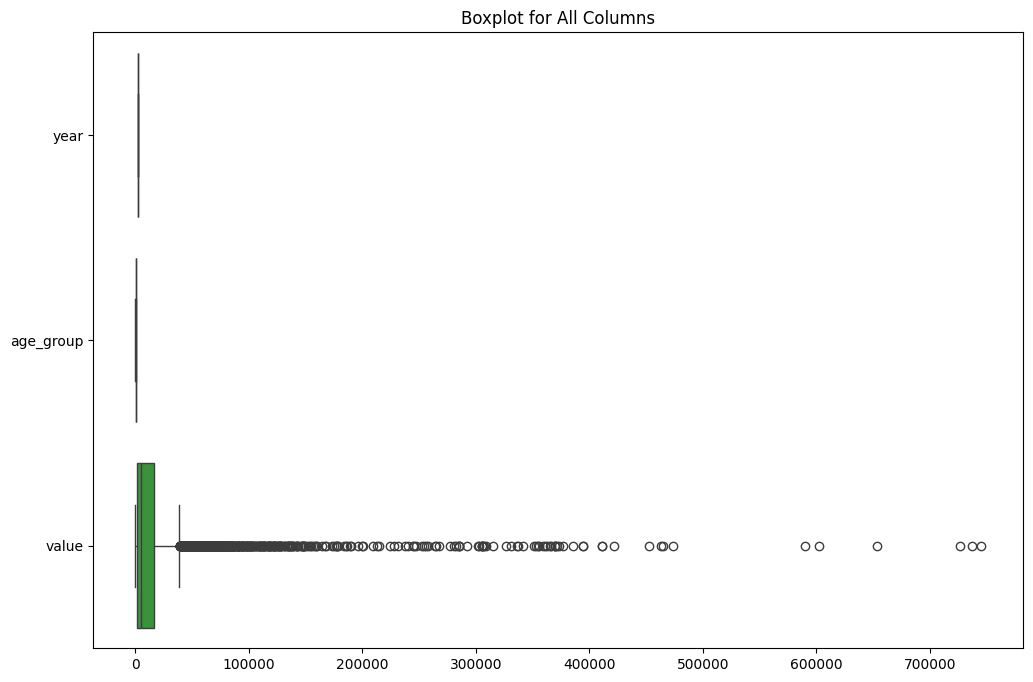

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
# สร้างแผนภูมิ Boxplot โดยใช้ Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="h")  # orient="h" หมายถึงแสดงแนวนอน
plt.title('Boxplot for All Columns')
plt.show()

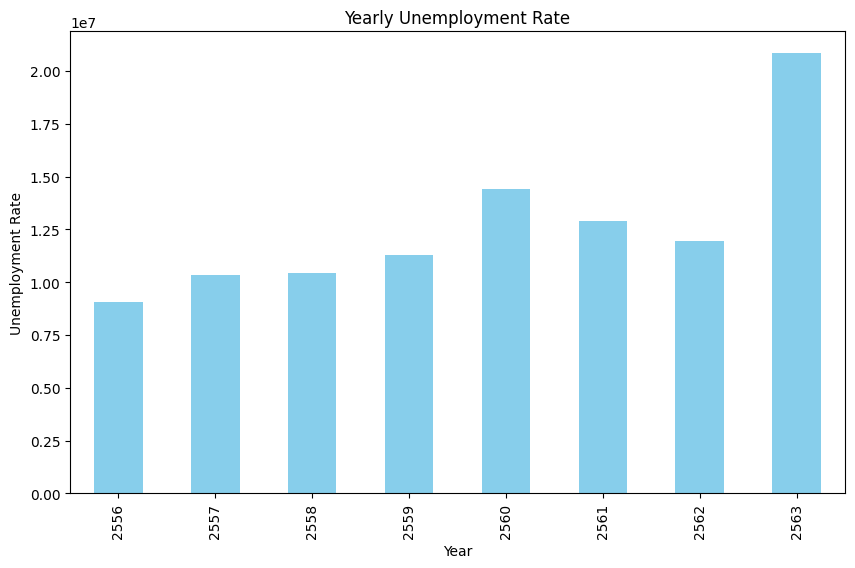

In [33]:
grouped = df.groupby('year')['value'].sum()
# สร้างกราฟแท่ง
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', color='skyblue')
plt.title('Yearly Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.show()

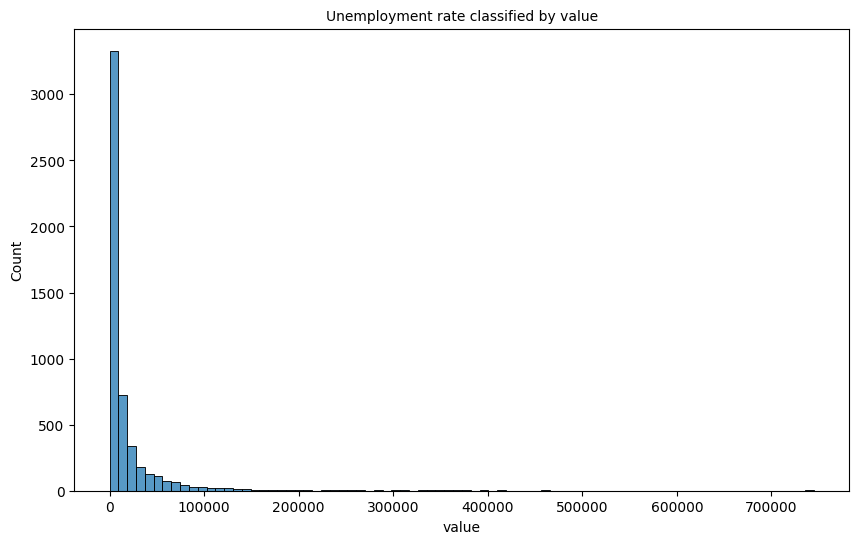

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(df['value'],bins=80)
plt.title('Unemployment rate classified by value', fontsize=10)
plt.show()

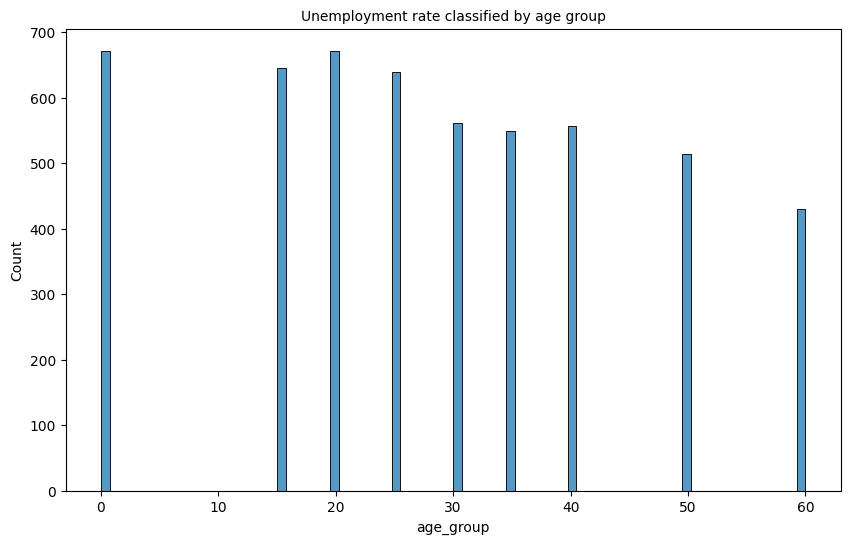

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age_group'],bins=80)
plt.title('Unemployment rate classified by age group', fontsize=10)
plt.show()

In [36]:
duplicates = df[df.duplicated()]
duplicates

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value,source


In [37]:
df2 = df.groupby(['year'])['year'].count()
df2

year
2556    639
2557    655
2558    651
2559    652
2560    660
2561    665
2562    648
2563    669
Name: year, dtype: int64

In [38]:
# สร้าง mapping ของค่าเดิมและค่าใหม่
year_mapping = {
    2555: 1,
    2556: 2,
    2557: 3,
    2558: 4,
    2559: 5,
    2560: 6,
    2561: 7,
    2562: 8,
    2563: 9
}

# ใช้เมธอด replace เพื่อเปลี่ยนค่าในคอลัมน์ 'year'
df['year'] = df['year'].replace(year_mapping)

In [39]:
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value,source
0,ในระบบ,7,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60,นายจ้าง,รวม,370.0,สำนักงานสถิติแห่งชาติ
1,ในระบบ,7,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60,ประกอบธุรกิจส่วนตัว,หางานทำ,170.0,สำนักงานสถิติแห่งชาติ
2,ในระบบ,7,ไตรมาสที่ 3,ภาคเหนือ,ชาย,60,ช่วยธุรกิจครัวเรือน,ไม่หางานทำ/พร้อมที่จะทำงาน,200.0,สำนักงานสถิติแห่งชาติ
3,ในระบบ,7,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60,ลูกจ้างรัฐบาล,รวม,1830.0,สำนักงานสถิติแห่งชาติ
4,ในระบบ,7,ไตรมาสที่ 4,ภาคเหนือ,ชาย,60,ลูกจ้างเอกชน,หางานทำ,110.0,สำนักงานสถิติแห่งชาติ
...,...,...,...,...,...,...,...,...,...,...
5234,นอกระบบ,7,ไตรมาสที่ 1,ทั่วประเทศ,รวม,25,ช่วยธุรกิจครัวเรือน,หางานทำ,0.0,สำนักงานสถิติแห่งชาติ
5235,นอกระบบ,7,ไตรมาสที่ 1,ทั่วประเทศ,ชาย,25,ลูกจ้างรัฐบาล,ไม่หางานทำ/พร้อมที่จะทำงาน,0.0,สำนักงานสถิติแห่งชาติ
5236,นอกระบบ,7,ไตรมาสที่ 2,ทั่วประเทศ,หญิง,25,ลูกจ้างเอกชน,รวม,0.0,สำนักงานสถิติแห่งชาติ
5237,นอกระบบ,7,ไตรมาสที่ 2,ทั่วประเทศ,รวม,25,การรวมกลุ่ม,หางานทำ,0.0,สำนักงานสถิติแห่งชาติ


In [40]:
df2 = df.groupby(['quarter'])['quarter'].count()
df2

quarter
ไตรมาสที่ 1    1293
ไตรมาสที่ 2    1317
ไตรมาสที่ 3    1316
ไตรมาสที่ 4    1313
Name: quarter, dtype: int64

In [61]:
# สร้าง mapping ของค่าเดิมและค่าใหม่
quarter_mapping = {
    'ไตรมาสที่ 1' : 1,
    'ไตรมาสที่ 2': 2,
    'ไตรมาสที่ 3': 3,
    'ไตรมาสที่ 4': 4,
}

# ใช้เมธอด replace เพื่อเปลี่ยนค่าในคอลัมน์ 'quarter'
df['quarter'].replace(quarter_mapping, inplace=True)

In [62]:
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value
0,ในระบบ,7,3,5,1,60,นายจ้าง,2,370.0
1,ในระบบ,7,3,5,1,60,ประกอบธุรกิจส่วนตัว,3,170.0
2,ในระบบ,7,3,5,1,60,ช่วยธุรกิจครัวเรือน,5,200.0
3,ในระบบ,7,4,5,1,60,ลูกจ้างรัฐบาล,2,1830.0
4,ในระบบ,7,4,5,1,60,ลูกจ้างเอกชน,3,110.0
...,...,...,...,...,...,...,...,...,...
5234,นอกระบบ,7,1,2,2,25,ช่วยธุรกิจครัวเรือน,3,0.0
5235,นอกระบบ,7,1,2,1,25,ลูกจ้างรัฐบาล,5,0.0
5236,นอกระบบ,7,2,2,3,25,ลูกจ้างเอกชน,2,0.0
5237,นอกระบบ,7,2,2,2,25,การรวมกลุ่ม,3,0.0


In [63]:
df2 = df.groupby(['age_group'])['age_group'].count()
df2

age_group
0     671
15    645
20    672
25    639
30    561
35    550
40    557
50    514
60    430
Name: age_group, dtype: int64

In [64]:
df2 = df.groupby(['region'])['region'].count()
df2

region
1    768
2    925
3    908
4    865
5    894
6    879
Name: region, dtype: int64

In [65]:
# สร้าง mapping ของค่าเดิมและค่าใหม่
region_mapping = {
    'กรุงเทพมหานคร': 1,
    'ทั่วประเทศ': 2,
    'ภาคกลาง': 3,
    'ภาคตะวันออกเฉียงเหนือ': 4,
    'ภาคเหนือ': 5,
    'ภาคใต้': 6
}

# ใช้เมธอด replace เพื่อเปลี่ยนค่าในคอลัมน์ 'region'
df['region'] = df['region'].replace(region_mapping)

In [66]:
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value
0,ในระบบ,7,3,5,1,60,นายจ้าง,2,370.0
1,ในระบบ,7,3,5,1,60,ประกอบธุรกิจส่วนตัว,3,170.0
2,ในระบบ,7,3,5,1,60,ช่วยธุรกิจครัวเรือน,5,200.0
3,ในระบบ,7,4,5,1,60,ลูกจ้างรัฐบาล,2,1830.0
4,ในระบบ,7,4,5,1,60,ลูกจ้างเอกชน,3,110.0
...,...,...,...,...,...,...,...,...,...
5234,นอกระบบ,7,1,2,2,25,ช่วยธุรกิจครัวเรือน,3,0.0
5235,นอกระบบ,7,1,2,1,25,ลูกจ้างรัฐบาล,5,0.0
5236,นอกระบบ,7,2,2,3,25,ลูกจ้างเอกชน,2,0.0
5237,นอกระบบ,7,2,2,2,25,การรวมกลุ่ม,3,0.0


In [82]:
# สร้าง mapping ของค่าเดิมและค่าใหม่
region_mapping = {
    'ชาย': 1,
    'หญิง': 2,
    'รวม': 3,
}

# ใช้เมธอด replace เพื่อเปลี่ยนค่าในคอลัมน์ 'sex'
df['sex'] = df['sex'].replace(region_mapping)

In [83]:
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value
0,ในระบบ,7,3,5,1,60,นายจ้าง,2,370.0
1,ในระบบ,7,3,5,1,60,ประกอบธุรกิจส่วนตัว,3,170.0
2,ในระบบ,7,3,5,1,60,ช่วยธุรกิจครัวเรือน,5,200.0
3,ในระบบ,7,4,5,1,60,ลูกจ้างรัฐบาล,2,1830.0
4,ในระบบ,7,4,5,1,60,ลูกจ้างเอกชน,3,110.0
...,...,...,...,...,...,...,...,...,...
5234,นอกระบบ,7,1,2,2,25,ช่วยธุรกิจครัวเรือน,3,0.0
5235,นอกระบบ,7,1,2,1,25,ลูกจ้างรัฐบาล,5,0.0
5236,นอกระบบ,7,2,2,3,25,ลูกจ้างเอกชน,2,0.0
5237,นอกระบบ,7,2,2,2,25,การรวมกลุ่ม,3,0.0


In [84]:
df2 = df.groupby(['sex'])['sex'].count()
df2

sex
1    1754
2    1731
3    1754
Name: sex, dtype: int64

In [89]:
# สร้าง mapping ของค่าเดิมและค่าใหม่
labor_mapping = {
    'นอกเขตเทศบาล': 1,
    'รวม': 2,
    'หางานทำ': 3,
    'ในเขตเทศบาล': 4,
    'ไม่หางานทำ/พร้อมที่จะทำงาน': 5,
}

# ใช้เมธอด replace เพื่อเปลี่ยนค่าในคอลัม์ 'labor_force_sta'
df['labor_force_sta'] = df['labor_force_sta'].replace(labor_mapping)

In [90]:
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value
0,ในระบบ,7,3,5,1,60,นายจ้าง,2,370.0
1,ในระบบ,7,3,5,1,60,ประกอบธุรกิจส่วนตัว,3,170.0
2,ในระบบ,7,3,5,1,60,ช่วยธุรกิจครัวเรือน,5,200.0
3,ในระบบ,7,4,5,1,60,ลูกจ้างรัฐบาล,2,1830.0
4,ในระบบ,7,4,5,1,60,ลูกจ้างเอกชน,3,110.0
...,...,...,...,...,...,...,...,...,...
5234,นอกระบบ,7,1,2,2,25,ช่วยธุรกิจครัวเรือน,3,0.0
5235,นอกระบบ,7,1,2,1,25,ลูกจ้างรัฐบาล,5,0.0
5236,นอกระบบ,7,2,2,3,25,ลูกจ้างเอกชน,2,0.0
5237,นอกระบบ,7,2,2,2,25,การรวมกลุ่ม,3,0.0


In [91]:
df2 = df.groupby(['labor_force_sta'])['labor_force_sta'].count()
df2

labor_force_sta
2    1820
3    1612
5    1807
Name: labor_force_sta, dtype: int64

In [92]:
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value
0,ในระบบ,7,3,5,1,60,นายจ้าง,2,370.0
1,ในระบบ,7,3,5,1,60,ประกอบธุรกิจส่วนตัว,3,170.0
2,ในระบบ,7,3,5,1,60,ช่วยธุรกิจครัวเรือน,5,200.0
3,ในระบบ,7,4,5,1,60,ลูกจ้างรัฐบาล,2,1830.0
4,ในระบบ,7,4,5,1,60,ลูกจ้างเอกชน,3,110.0
...,...,...,...,...,...,...,...,...,...
5234,นอกระบบ,7,1,2,2,25,ช่วยธุรกิจครัวเรือน,3,0.0
5235,นอกระบบ,7,1,2,1,25,ลูกจ้างรัฐบาล,5,0.0
5236,นอกระบบ,7,2,2,3,25,ลูกจ้างเอกชน,2,0.0
5237,นอกระบบ,7,2,2,2,25,การรวมกลุ่ม,3,0.0


In [94]:
# สร้าง mapping ของค่าเดิมและค่าใหม่
system_mapping = {
    'ในระบบ': 1,
    'นอกระบบ': 2,
}

# ใช้เมธอด replace เพื่อเปลี่ยนค่าในคอลัมน์ 'system'
df['system'] = df['system'].replace(system_mapping)

In [95]:
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value
0,1,7,3,5,1,60,นายจ้าง,2,370.0
1,1,7,3,5,1,60,ประกอบธุรกิจส่วนตัว,3,170.0
2,1,7,3,5,1,60,ช่วยธุรกิจครัวเรือน,5,200.0
3,1,7,4,5,1,60,ลูกจ้างรัฐบาล,2,1830.0
4,1,7,4,5,1,60,ลูกจ้างเอกชน,3,110.0
...,...,...,...,...,...,...,...,...,...
5234,2,7,1,2,2,25,ช่วยธุรกิจครัวเรือน,3,0.0
5235,2,7,1,2,1,25,ลูกจ้างรัฐบาล,5,0.0
5236,2,7,2,2,3,25,ลูกจ้างเอกชน,2,0.0
5237,2,7,2,2,2,25,การรวมกลุ่ม,3,0.0


In [96]:
# สร้าง mapping ของค่าเดิมและค่าใหม่
occupation_mapping = {
    'นายจ้าง': 1,
    'ประกอบธุรกิจส่วนตัว': 2,
    'ช่วยธุรกิจครัวเรือน': 3,
    'ลูกจ้างรัฐบาล': 4,
    'ลูกจ้างเอกชน': 5,
    'การรวมกลุ่ม': 6,
    'รวม': 7,
}

# ใช้เมธอด replace เพื่อเปลี่ยนค่าในคอลัมน์ 'occupation'
df['occupation'] = df['occupation'].replace(occupation_mapping)

In [97]:
df

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta,value
0,1,7,3,5,1,60,1,2,370.0
1,1,7,3,5,1,60,2,3,170.0
2,1,7,3,5,1,60,3,5,200.0
3,1,7,4,5,1,60,4,2,1830.0
4,1,7,4,5,1,60,5,3,110.0
...,...,...,...,...,...,...,...,...,...
5234,2,7,1,2,2,25,3,3,0.0
5235,2,7,1,2,1,25,4,5,0.0
5236,2,7,2,2,3,25,5,2,0.0
5237,2,7,2,2,2,25,6,3,0.0


การพยากรณ์อัตราผู้ว่างงานทั้งในระบบและนอกระบบ พยากรณ์เพื่อตรวจสอบว่าในอนาคตผู้ว่างงานในระบบหรือนอกระบบในอนาคตอัตราว่างงานฝั่งใดจะมากกว่ากัน

In [123]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn.neighbors import KNeighborsRegressor

In [124]:
X = df.drop(columns='value')
X

,system,year,quarter,region,sex,age_group,occupation,labor_force_sta
0,1,7,3,5,1,60,1,2
1,1,7,3,5,1,60,2,3
2,1,7,3,5,1,60,3,5
3,1,7,4,5,1,60,4,2
4,1,7,4,5,1,60,5,3
...,...,...,...,...,...,...,...,...
5234,2,7,1,2,2,25,3,3
5235,2,7,1,2,1,25,4,5
5236,2,7,2,2,3,25,5,2
5237,2,7,2,2,2,25,6,3


In [125]:
y = df['value']
y

0        370.0
1        170.0
2        200.0
3       1830.0
4        110.0
         ...  
5234       0.0
5235       0.0
5236       0.0
5237       0.0
5238       0.0
Name: value, Length: 5239, dtype: float64

In [126]:
scaler = MinMaxScaler()

In [127]:
X_norm = scaler.fit_transform(X)
X_norm

array([[0.        , 0.71428571, 0.66666667, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.71428571, 0.66666667, ..., 1.        , 0.16666667,
        0.33333333],
       [0.        , 0.71428571, 0.66666667, ..., 1.        , 0.33333333,
        1.        ],
       ...,
       [1.        , 0.71428571, 0.33333333, ..., 0.41666667, 0.66666667,
        0.        ],
       [1.        , 0.71428571, 0.33333333, ..., 0.41666667, 0.83333333,
        0.33333333],
       [1.        , 0.71428571, 0.33333333, ..., 0.41666667, 1.        ,
        1.        ]])

In [128]:
X_norm

array([[0.        , 0.71428571, 0.66666667, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.71428571, 0.66666667, ..., 1.        , 0.16666667,
        0.33333333],
       [0.        , 0.71428571, 0.66666667, ..., 1.        , 0.33333333,
        1.        ],
       ...,
       [1.        , 0.71428571, 0.33333333, ..., 0.41666667, 0.66666667,
        0.        ],
       [1.        , 0.71428571, 0.33333333, ..., 0.41666667, 0.83333333,
        0.33333333],
       [1.        , 0.71428571, 0.33333333, ..., 0.41666667, 1.        ,
        1.        ]])

In [129]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.3, random_state=42)

In [130]:
print("Train shape: ", X_train.shape)
print("Test shape: ", X_test.shape)

Train shape:  (3667, 8)
Test shape:  (1572, 8)


In [106]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [114]:
# สร้างโมเดล KNN
knn = KNeighborsRegressor(n_neighbors=5)  # กำหนดจำนวนเพื่อบรรทัด k (เช่น n_neighbors=5)
# ทำการเทรนโมเดล KNN ด้วยข้อมูลการฝึกอบรม
knn.fit(X_train, y_train)
# ทำการทำนายด้วยข้อมูลทดสอบ
y_knn_pred = knn.predict(X_test)

In [115]:
def calculate_metrics(X, Y, model):
    pred = model.predict(X)
    mse = mean_squared_error(Y, pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(Y, pred)
    r2 = r2_score(Y, pred)
    return rmse, mae, r2

In [116]:
lr_rmse, lr_mae, lr_r2 = calculate_metrics(X_test, y_test, lr)
print(f"RMSE: {lr_rmse}")
print(f"MAE: {lr_mae}")
print(f"R^2: {lr_r2}")

RMSE: 43350.80380134391
MAE: 20047.169592665417
R^2: 0.19946567378922997


In [117]:
knn_rmse, knn_mae, knn_r2 = calculate_metrics(X_test, y_test, knn)
print(f"RMSE: {knn_rmse}")
print(f"MAE: {knn_mae}")
print(f"R^2: {knn_r2}")

RMSE: 36226.28036138796
MAE: 13345.413486005089
R^2: 0.4409725448796562


In [118]:
y_lr_pred = lr.predict(X_test[:30])
y_lr_pred

array([ 46967.66958176,  41852.9803111 ,  11245.03733079, -26080.25542398,
        20484.13417584, -16706.45494055,  -3502.59938242, -16328.37740541,
        25925.25231539, -26194.45838924,  21384.66089893,   -127.92166891,
        50804.84292349,  20911.38063033,  31772.77343123,   4735.3553776 ,
        21745.67093638,  13206.67046642,  38292.99570841,   1933.92666842,
        28566.46364468, -12565.64153743,   2707.71006574,  15245.66776541,
         2913.69221902, -19762.85440951,  27425.78070853,  13207.81813035,
        23467.67224225,  29923.8353597 ])

In [119]:
y_knn_pred = knn.predict(X_test[:30])
y_knn_pred

array([14376.,  8522.,  8002.,  1856., 20568.,  2704.,     0.,  1490.,
        8646.,  1446., 12104.,  9026., 30632., 27706., 51454.,  6494.,
        9382.,  9314., 25610.,  5346., 20992.,  2640.,  9812.,  6228.,
           0.,  4114.,  2462.,  8594., 20068., 20788.])

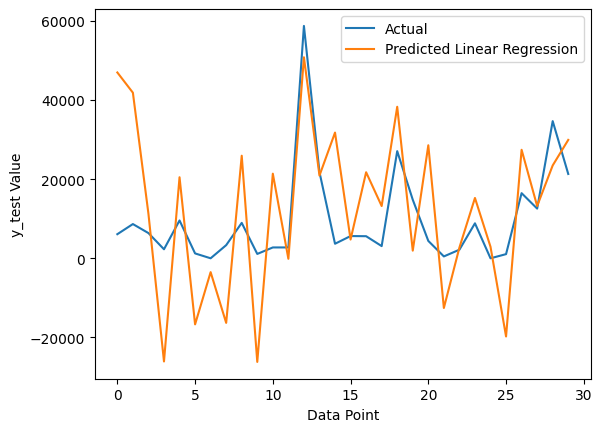

<Figure size 1200x400 with 0 Axes>

In [120]:
sns.lineplot(x=range(len(y_test[:30])), y=y_test[:30], label='Actual')
sns.lineplot(x=range(len(y_lr_pred[:30])), y=y_lr_pred[:30], label='Predicted Linear Regression')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.figure(figsize=(12, 4))
plt.show()

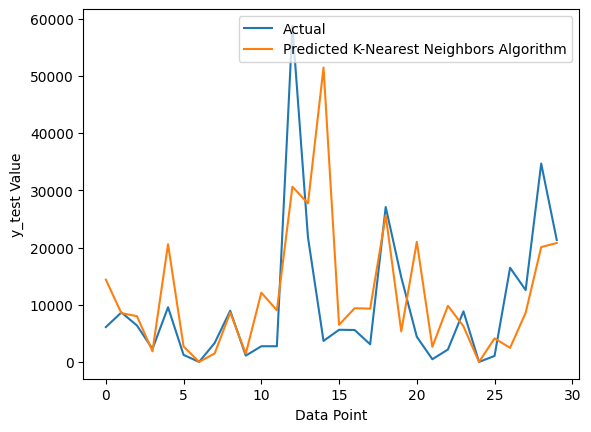

<Figure size 1200x400 with 0 Axes>

In [121]:
sns.lineplot(x=range(len(y_test[:30])), y=y_test[:30], label='Actual')
sns.lineplot(x=range(len(y_knn_pred[:30])), y=y_knn_pred[:30], label='Predicted K-Nearest Neighbors Algorithm')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.figure(figsize=(12, 4))
plt.show()

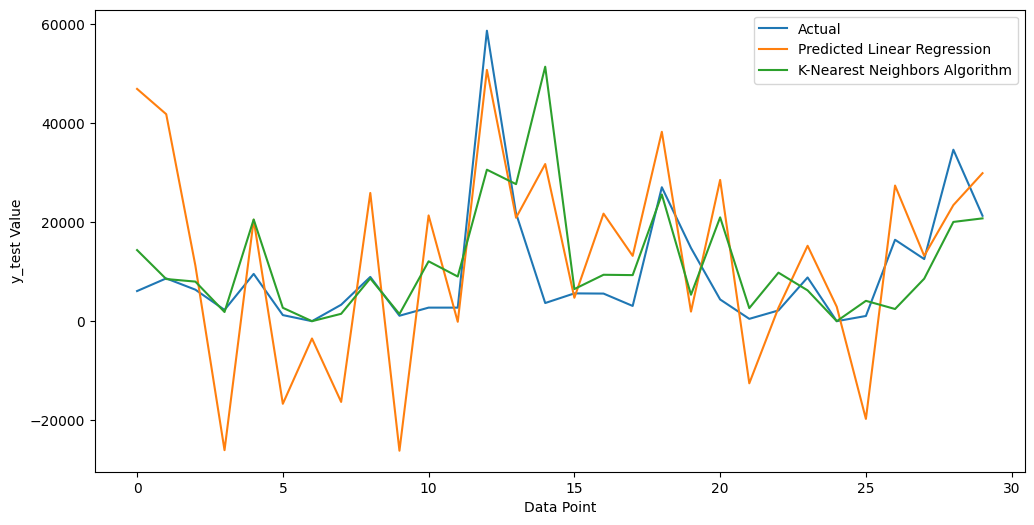

In [122]:
plt.figure(figsize=(12, 6))
# Plot actual data
sns.lineplot(x=range(len(y_test[:30])), y=y_test[:30], label='Actual')
# Plot predicted data for Linear Regression
sns.lineplot(x=range(len(y_lr_pred[:30])), y=y_lr_pred[:30], label='Predicted Linear Regression')
# Plot predicted data for K-Nearest Neighbors Algorithm
sns.lineplot(x=range(len(y_knn_pred[:30])), y=y_knn_pred[:30], label='K-Nearest Neighbors Algorithm')
plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.legend()
plt.show()